# Introduction

# Data Import

In [51]:
# import modules
import pandas as pd
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [6]:
# get current working directory
os.getcwd()

'/Users/mengphilshen/Dropbox/Project/Data_Challenges/Proj_Philly/code'

In [7]:
# setup configurations
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

In [8]:
# define helper function
def checkMissing(dataset):
    missing_data = dataset.isnull().sum(axis = 0).rest_index()
    missing_data.columns = ['variable', 'missing values']
    missing_data['missing%'] = missing_data['missing values'] / dataset.shape[0] * 100
    missing_data_srt = missing_data.sort_values('missing%', ascennding = False).reset_index(drop = True)
    print(missing_data_srt[missing_data_srt['missing%'] > 0])

## Parking Violations

### Parking Violations: CSV

In [10]:
# load parking CSV data
parkingCSV0 = pd.read_csv('/Users/mengphilshen/Dropbox/Project/Data_Challenges/Proj_Philly/data/parking.csv', 
                          header=None,
                          names=['date', 'fine', 'violation', 'plate_id', 'state', 'ticket_number',  'zip_code'])
parkingCSV0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25559 entries, 0 to 25558
Data columns (total 7 columns):
date             25559 non-null object
fine             25559 non-null int64
violation        25559 non-null object
plate_id         25559 non-null int64
state            25559 non-null object
ticket_number    25559 non-null int64
zip_code         20413 non-null float64
dtypes: float64(1), int64(3), object(3)
memory usage: 1.4+ MB


In [9]:
# load parking CSV data
# parkingCSV0 = pd.read_csv('D:\\Dropbox\\Project\\Data_Challenges\\Proj_Philly\\data\\parking.csv', 
#                           header=None,
#                           names=['date', 'fine', 'violation', 'plate_id', 'state', 'ticket_number',  'zip_code'])
# parkingCSV0.info()

In [11]:
# exclude missing values
parkingCSV1 = parkingCSV0.dropna()
parkingCSV1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20413 entries, 0 to 25558
Data columns (total 7 columns):
date             20413 non-null object
fine             20413 non-null int64
violation        20413 non-null object
plate_id         20413 non-null int64
state            20413 non-null object
ticket_number    20413 non-null int64
zip_code         20413 non-null float64
dtypes: float64(1), int64(3), object(3)
memory usage: 1.2+ MB


In [12]:
# check data characteristics
parkingCSV1.head()

,date,fine,violation,plate_id,state,ticket_number,zip_code
0,2013-04-03T15:15:00Z,36,METER EXPIRED CC,1322731,PA,2905938,19104.0
1,2013-04-03T07:35:00Z,51,DOUBLE PARKED,1322731,PA,2905939,19104.0
2,2013-09-18T14:58:00Z,41,EXPIRED INSPECTION,1322731,PA,2905940,19104.0
3,2013-09-23T13:58:00Z,41,EXPIRED INSPECTION,1322731,PA,2905941,19104.0
4,2013-01-11T13:31:00Z,36,METER EXPIRED CC,1199878,PA,2905942,19103.0


In [13]:
# check numeric variables
parkingCSV1.describe().T

,count,mean,std,min,25%,50%,75%,max
fine,20413.0,4.300460e+01,28.405536,26.0,26.0,36.0,51.0,301.0
plate_id,20413.0,1.143672e+06,450719.656398,3615.0,1071064.0,1313472.0,1347724.0,4729949.0
ticket_number,20413.0,2.921110e+06,120231.295649,2905938.0,2912317.0,2918690.0,2925180.0,8981588.0
zip_code,20413.0,1.912269e+04,17.935812,19102.0,19104.0,19123.0,19142.0,19154.0


In [14]:
# check character variables
for col in parkingCSV1.select_dtypes(include='object').columns:
    print("\n")
    print(col)
    print(parkingCSV1[col].value_counts(dropna=False))



date
2013-09-20T11:22:00Z    3
2013-03-25T11:28:00Z    3
2013-03-19T13:57:00Z    3
2013-03-14T17:21:00Z    3
2013-03-23T11:51:00Z    3
                       ..
2013-02-19T16:03:00Z    1
2013-12-30T14:41:00Z    1
2013-03-22T12:22:00Z    1
2013-04-07T18:00:00Z    1
2013-03-22T13:45:00Z    1
Name: date, Length: 19485, dtype: int64


violation
METER EXPIRED CC        5874
METER EXPIRED           2768
OVER TIME LIMIT         2559
STOP PROHIBITED CC      1838
EXPIRED INSPECTION      1482
PARKING PROHBITED CC    862 
STOPPING PROHIBITED     834 
OVER TIME LIMIT CC      641 
PARKING PROHBITED       606 
PASSENGR LOADNG ZONE    478 
BUS ONLY ZONE           337 
FIRE HYDRANT            260 
LOADING ZONE   CC       232 
SIDEWALK                197 
HP RESERVED SPACE       169 
BUS ONLY ZONE   CC      163 
SCHOOL ZONE             134 
STREET CLEANING         124 
CORNER CLEARANCE        120 
DOUBLE PARKED           99  
CROSSWALK               92  
SIDEWALK   CC           79  
DOUBLE PARKED  CC

### Parking Violations: JSON

In [15]:
# load parking JSON data
parkingJSON0 = pd.read_json('/Users/mengphilshen/Dropbox/Project/Data_Challenges/Proj_Philly/data/parking.json')
parkingJSON0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25559 entries, 0 to 25558
Data columns (total 7 columns):
ticket_number    25559 non-null int64
plate_id         25559 non-null int64
date             25559 non-null datetime64[ns, UTC]
zip_code         25559 non-null object
violation        25559 non-null object
fine             25559 non-null int64
state            25559 non-null object
dtypes: datetime64[ns, UTC](1), int64(3), object(3)
memory usage: 1.4+ MB


In [16]:
# load parking JSON data
# parkingJSON0 = pd.read_json('D:\\Dropbox\\Project\\Data_Challenges\\Proj_Philly\\data\\parking.json')
# parkingJSON0.info()

In [17]:
# exclude parking for which the ZIP code format is not correct
parkingJSON1 = parkingJSON0[parkingJSON0['zip_code'].str.match('[0-9]{5}')]
parkingJSON1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20413 entries, 0 to 25558
Data columns (total 7 columns):
ticket_number    20413 non-null int64
plate_id         20413 non-null int64
date             20413 non-null datetime64[ns, UTC]
zip_code         20413 non-null object
violation        20413 non-null object
fine             20413 non-null int64
state            20413 non-null object
dtypes: datetime64[ns, UTC](1), int64(3), object(3)
memory usage: 1.2+ MB


In [18]:
# check data characteristics
parkingJSON1.head()

,ticket_number,plate_id,date,zip_code,violation,fine,state
0,2905938,1322731,2013-04-03 15:15:00+00:00,19104,METER EXPIRED CC,36,PA
1,2905939,1322731,2013-04-03 07:35:00+00:00,19104,DOUBLE PARKED,51,PA
2,2905940,1322731,2013-09-18 14:58:00+00:00,19104,EXPIRED INSPECTION,41,PA
3,2905941,1322731,2013-09-23 13:58:00+00:00,19104,EXPIRED INSPECTION,41,PA
4,2905942,1199878,2013-01-11 13:31:00+00:00,19103,METER EXPIRED CC,36,PA


In [19]:
# check numeric variables
parkingJSON1.describe().T

,count,mean,std,min,25%,50%,75%,max
ticket_number,20413.0,2.921110e+06,120231.295649,2905938.0,2912317.0,2918690.0,2925180.0,8981588.0
plate_id,20413.0,1.143672e+06,450719.656398,3615.0,1071064.0,1313472.0,1347724.0,4729949.0
fine,20413.0,4.300460e+01,28.405536,26.0,26.0,36.0,51.0,301.0


In [20]:
# check character variables
for col in parkingJSON1.select_dtypes(include='object').columns:
    print("\n")
    print(col)
    print(parkingJSON1[col].value_counts(dropna=False))



zip_code
19103    2665
19107    2286
19147    2212
19104    1979
19106    1311
19130    1175
19146    1061
19102    864 
19123    776 
19148    551 
19140    515 
19139    502 
19141    445 
19144    403 
19145    401 
19127    386 
19124    357 
19121    332 
19120    273 
19132    179 
19134    179 
19143    171 
19142    169 
19149    134 
19129    129 
19133    127 
19118    100 
19128    97  
19111    81  
19125    78  
19122    78  
19135    77  
19136    66  
19131    55  
19119    43  
19152    41  
19151    31  
19126    19  
19138    15  
19110    13  
19150    13  
19153    9   
19109    6   
19115    5   
19114    2   
19108    1   
19154    1   
Name: zip_code, dtype: int64


violation
METER EXPIRED CC        5874
METER EXPIRED           2768
OVER TIME LIMIT         2559
STOP PROHIBITED CC      1838
EXPIRED INSPECTION      1482
PARKING PROHBITED CC    862 
STOPPING PROHIBITED     834 
OVER TIME LIMIT CC      641 
PARKING PROHBITED       606 
PASSENGR LOADNG ZONE    478 


## Property Values

In [22]:
# load properties CSV data
propertiesCSV0 = pd.read_csv('/Users/mengphilshen/Dropbox/Project/Data_Challenges/Proj_Philly/data/properties.csv')
propertiesCSV0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581325 entries, 0 to 581324
Data columns (total 77 columns):
number_of_rooms              581316 non-null float64
assessment_date              125 non-null object
beginning_point              570183 non-null object
book_and_page                578504 non-null object
building_code                581324 non-null object
building_code_description    581324 non-null object
category_code                581324 non-null float64
category_code_description    581324 non-null object
census_tract                 581325 non-null float64
central_air                  283909 non-null object
cross_reference              120688 non-null object
date_exterior_condition      361945 non-null object
depth                        581324 non-null float64
exempt_building              581234 non-null float64
exempt_land                  581234 non-null float64
exterior_condition           555723 non-null float64
fireplaces                   581305 non-null float64


In [23]:
# check data characteristics
propertiesCSV0.head()

,number_of_rooms,assessment_date,beginning_point,book_and_page,building_code,building_code_description,category_code,category_code_description,census_tract,central_air,cross_reference,date_exterior_condition,depth,exempt_building,exempt_land,exterior_condition,fireplaces,frontage,fuel,garage_spaces,garage_type,general_construction,geographic_ward,homestead_exemption,house_extension,house_number,interior_condition,location,mailing_address_1,mailing_address_2,mailing_care_of,mailing_city_state,mailing_street,mailing_zip,market_value,market_value_date,number_of_bathrooms,number_of_bedrooms,basements,number_stories,off_street_open,other_building,owner_1,owner_2,parcel_number,parcel_shape,quality_grade,recording_date,registry_number,sale_date,sale_price,separate_utilities,sewer,site_type,state_code,street_code,street_designation,street_direction,street_name,suffix,taxable_building,taxable_land,topography,total_area,total_livable_area,type_heater,unfinished,unit,utility,view_type,year_built,year_built_estimate,zip_code,zoning,objectid,lat,lng
0,0.0,NaN,"32'6"" S TASKER ST",602048,U50,ROW CONV/APT 3 STY MASON,2.0,Multi Family,750.0,N,NaN,NaN,65.17,0.0,0.0,4.0,0.0,16.0,NaN,0.0,0,A,1.0,0.0,0,1604,4.0,1604 S 4TH ST,C/O CHRISTOPHER CATALAW,NaN,KAREN CATALANO,SEWELL NJ,100 GOLFVIEW DR,08080-1836,264800.0,NaN,2.0,4.0,D,3.0,0.0,NaN,CATALANO KAREN,NaN,11429900,E,NaN,1986-10-15,012S090302,1986-01-08,22500.0,NaN,NaN,A,1002.0,87880,ST,S,04TH,NaN,205750.0,59050.0,F,1042.72,1800.0,H,NaN,NaN,NaN,I,1900,Y,191481303,RM1,529788186,39.928194,-75.152368
1,0.0,NaN,"48'6"" S TASKER ST",3.40002e+06,O50,ROW 3 STY MASONRY,1.0,Single Family,750.0,Y,NaN,NaN,65.17,40000.0,0.0,2.0,0.0,16.0,NaN,0.0,0,A,1.0,40000.0,0,1606,2.0,1606 S 4TH ST,NaN,NaN,NaN,NaN,NaN,NaN,416500.0,NaN,2.0,4.0,D,3.0,0.0,NaN,ONEILL KATHERINE M,FONG MARSHALL,11430000,E,NaN,2018-08-06,012S090303,2018-08-06,585000.0,NaN,NaN,A,1001.0,87880,ST,S,04TH,NaN,288264.0,88236.0,F,1042.72,1800.0,H,NaN,NaN,NaN,I,1900,Y,191481303,RM1,529788187,39.928149,-75.152377
2,0.0,NaN,"64'6"" S TASKER ST",1.41654e+06,O50,ROW 3 STY MASONRY,1.0,Single Family,750.0,Y,NaN,NaN,63.17,40000.0,0.0,4.0,0.0,16.0,NaN,0.0,0,A,1.0,40000.0,0,1608,4.0,1608 S 4TH ST,NaN,NaN,NaN,NaN,NaN,NaN,289000.0,NaN,2.0,4.0,D,3.0,0.0,NaN,FEINSTEIN SARA BETH,NaN,11430100,E,NaN,2006-04-11,012S090304,2006-03-31,425000.0,NaN,NaN,A,1001.0,87880,ST,S,04TH,NaN,184553.0,64447.0,F,1010.72,1800.0,H,NaN,NaN,NaN,I,1900,NaN,191481303,RM1,529788188,39.928105,-75.152386
3,0.0,NaN,"80'6"" S TASKER ST",557506,O50,ROW 3 STY MASONRY,1.0,Single Family,750.0,N,NaN,NaN,63.17,0.0,0.0,4.0,0.0,16.0,NaN,0.0,0,A,1.0,0.0,0,1610,4.0,1610 S 4TH ST,NaN,NaN,NaN,PHILADELPHIA PA,719 S 3RD ST,19147-3310,295400.0,NaN,2.0,5.0,D,3.0,0.0,NaN,JOSE TAVARES,IRENE H/W,11430200,E,NaN,1982-09-17,012S090305,1982-09-15,30000.0,NaN,NaN,A,1001.0,87880,ST,S,04TH,NaN,229526.0,65874.0,F,1010.72,2140.0,H,NaN,NaN,NaN,I,1900,Y,191481303,RM1,529788189,39.928060,-75.152395
4,7.0,NaN,"96'6"" S TASKER ST",1.10893e+06,U50,ROW CONV/APT 3 STY MASON,2.0,Multi Family,750.0,N,NaN,NaN,63.17,0.0,0.0,4.0,0.0,16.0,NaN,0.0,0,A,1.0,0.0,0,1612,4.0,1612 S 4TH ST,NaN,NaN,NaN,PHILADELPHIA PA,701 S 20TH ST,19146-1861,282900.0,NaN,2.0,4.0,D,3.0,0.0,NaN,HSU IRENE,NaN,11430300,E,NaN,2005-01-31,012S090306,2005-01-25,212500.0,NaN,NaN,A,1002.0,87880,ST,S,04TH,NaN,219813.0,63087.0,F,1010.72,2140.0,H,NaN,NaN,NaN,I,1900,Y,191481303,RM1,529788190,39.928017,-75.152405


In [21]:
# load properties CSV data
# propertiesCSV0 = pd.read_csv('D:\\Dropbox\\Project\\Data_Challenges\\Proj_Philly\\data\\properties.csv')
# propertiesCSV0.info()

In [28]:
# select relevant features
propertiesCSV1 = propertiesCSV0[['market_value', 'total_livable_area', 'zip_code']]
propertiesCSV1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581325 entries, 0 to 581324
Data columns (total 3 columns):
market_value          581234 non-null float64
total_livable_area    581316 non-null float64
zip_code              581322 non-null object
dtypes: float64(2), object(1)
memory usage: 13.3+ MB


In [29]:
# get substrings of zip_code
propertiesCSV2 = propertiesCSV1.dropna()
propertiesCSV2['zip_code'] = propertiesCSV2.zip_code.astype(str).str.strip().str.slice(0, 5)
propertiesCSV2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 581224 entries, 0 to 581324
Data columns (total 3 columns):
market_value          581224 non-null float64
total_livable_area    581224 non-null float64
zip_code              581224 non-null object
dtypes: float64(2), object(1)
memory usage: 17.7+ MB


In [30]:
# exclude properties for which the ZIP code format is not correct
propertiesCSV3 = propertiesCSV2[propertiesCSV2['zip_code'].str.match('[0-9]{5}')]
propertiesCSV3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 581221 entries, 0 to 581324
Data columns (total 3 columns):
market_value          581221 non-null float64
total_livable_area    581221 non-null float64
zip_code              581221 non-null object
dtypes: float64(2), object(1)
memory usage: 17.7+ MB


In [31]:
# check data characteristics
propertiesCSV3.head()

,market_value,total_livable_area,zip_code
0,264800.0,1800.0,19148
1,416500.0,1800.0,19148
2,289000.0,1800.0,19148
3,295400.0,2140.0,19148
4,282900.0,2140.0,19148


In [32]:
# check numeric variables
propertiesCSV3.describe().T

,count,mean,std,min,25%,50%,75%,max
market_value,581221.0,290914.931697,2.979435e+06,0.0,68000.0,128900.0,215100.0,454197400.0
total_livable_area,581221.0,2251.871240,1.651747e+04,0.0,1024.0,1230.0,1586.0,2500000.0


In [33]:
# check character variables
propertiesCSV3['zip_code'].value_counts(dropna=False)

19134    25660
19143    25494
19124    23170
19140    22828
19120    21604
19148    21356
19132    20674
19146    20488
19111    19178
19145    18702
19149    18494
19147    16771
19121    16610
19139    16459
19131    14911
19133    14471
19128    13726
19144    13522
19138    12754
19125    12669
19135    12125
19104    11858
19154    11538
19142    11425
19151    11367
19136    11245
19130    10859
19115    10522
19152    10409
19116    10402
19114    10360
19141    10117
19119    9754 
19150    9242 
19122    8625 
19103    7819 
19106    6857 
19123    6786 
19126    5066 
19107    4637 
19153    4222 
19129    4169 
19137    3987 
19127    3070 
19118    2973 
19102    2154 
19112    77   
19109    4    
19113    4    
19108    4    
19110    2    
29127    1    
Name: zip_code, dtype: int64

## Population

In [25]:
# load population CSV data
populationTXT0 = pd.read_csv('/Users/mengphilshen/Dropbox/Project/Data_Challenges/Proj_Philly/data/population.txt', 
                             sep=" ", 
                             header=None,
                             names=['zip_code', 'population'])
populationTXT0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
zip_code      48 non-null int64
population    48 non-null int64
dtypes: int64(2)
memory usage: 896.0 bytes


In [26]:
# load population CSV data
# populationTXT0 = pd.read_csv('D:\\Dropbox\\Project\\Data_Challenges\\Proj_Philly\\data\\population.txt', 
#                              sep=" ", 
#                              header=None,
#                              names=['zip_code', 'population'])
# populationTXT0.info()

In [27]:
# check data characteristics
populationTXT0

,zip_code,population
0,19102,4705
1,19103,21908
2,19104,51808
3,19106,11740
4,19107,14875
5,19111,63090
6,19112,13
7,19113,120
8,19114,30907
9,19115,33207


# Total Population for All ZIP codes

In [34]:
# caculate total population for all ZIP codes
totalPopulation = populationTXT0.iloc[:, 1].sum()
print("Total Population for All ZIP codes =", totalPopulation)

Total Population for All ZIP codes = 1526206


# Total Fines per Capita

In [35]:
# exclude parking violations for which the ZIP code is unknown or for which the vehicles's plate is not "PA"
parkingPA = parkingCSV1[(parkingCSV1['zip_code'].notnull()) & (parkingCSV1['state'] == 'PA')]
parkingPA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16828 entries, 0 to 25550
Data columns (total 7 columns):
date             16828 non-null object
fine             16828 non-null int64
violation        16828 non-null object
plate_id         16828 non-null int64
state            16828 non-null object
ticket_number    16828 non-null int64
zip_code         16828 non-null float64
dtypes: float64(1), int64(3), object(3)
memory usage: 1.0+ MB


In [36]:
# Convert data type
parkingPA['zip_code'] = parkingPA['zip_code'].astype(int)
parkingPA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16828 entries, 0 to 25550
Data columns (total 7 columns):
date             16828 non-null object
fine             16828 non-null int64
violation        16828 non-null object
plate_id         16828 non-null int64
state            16828 non-null object
ticket_number    16828 non-null int64
zip_code         16828 non-null int64
dtypes: int64(4), object(3)
memory usage: 1.0+ MB


In [37]:
# sum fines by zip_code
parkingByZIP = parkingPA.groupby('zip_code')[['fine']].sum().reset_index()
parkingByZIP

,zip_code,fine
0,19102,32628
1,19103,107608
2,19104,64426
3,19106,48401
4,19107,93142
5,19108,36
6,19109,356
7,19110,761
8,19111,2531
9,19114,67


In [38]:
# join dataframes on zip_code
populationParking = pd.merge(parkingByZIP, populationTXT0, on = 'zip_code', how = 'inner')
populationParking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 0 to 41
Data columns (total 3 columns):
zip_code      42 non-null int64
fine          42 non-null int64
population    42 non-null int64
dtypes: int64(3)
memory usage: 1.3 KB


In [39]:
# caculate total fines per capita
populationParking['average_fine'] = populationParking['fine'] / populationParking['population']
populationParking.style.format({'average_fine' : '{:.4f}'})

,zip_code,fine,population,average_fine
0,19102,32628,4705,6.9348
1,19103,107608,21908,4.9118
2,19104,64426,51808,1.2436
3,19106,48401,11740,4.1227
4,19107,93142,14875,6.2616
5,19111,2531,63090,0.0401
6,19114,67,30907,0.0022
7,19118,3108,9808,0.3169
8,19119,1647,27035,0.0609
9,19120,10931,68104,0.1605


# Average Residential Market Value

In [41]:
# aggregate market_value by zip_code
propertiesByZIP1 = propertiesCSV3.groupby('zip_code')[['market_value']].agg(['sum', 'count']).reset_index()
propertiesByZIP1.columns = ['zip_code', 'sum_market_value', 'count_market_value']
propertiesByZIP1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
zip_code              52 non-null object
sum_market_value      52 non-null float64
count_market_value    52 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ KB


In [42]:
# caculate average residential market value
propertiesByZIP1['average_market_value'] = propertiesByZIP1['sum_market_value'] / propertiesByZIP1['count_market_value']
propertiesByZIP1.style.format({'sum_market_value' : '{:.4f}', 'average_market_value' : '{:.4f}'})

,zip_code,sum_market_value,count_market_value,average_market_value
0,19102,4615710000.0000,2154,2142855.1532
1,19103,15975081700.0000,7819,2043110.5896
2,19104,11381607000.0000,11858,959825.1813
3,19106,7430529200.0000,6857,1083641.4175
4,19107,7919420300.0000,4637,1707875.8465
5,19108,251274900.0000,4,62818725.0000
6,19109,144078500.0000,4,36019625.0000
7,19110,64820700.0000,2,32410350.0000
8,19111,4302336100.0000,19178,224337.0581
9,19112,649803300.0000,77,8439003.8961


# Average Residential Total Livable Area

In [43]:
# aggregate total_livable_area by zip_code
propertiesByZIP2 = propertiesCSV3.groupby('zip_code')[['total_livable_area']].agg(['sum', 'count']).reset_index()
propertiesByZIP2.columns = ['zip_code', 'sum_total_livable_area', 'count_total_livable_area']
propertiesByZIP2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
zip_code                    52 non-null object
sum_total_livable_area      52 non-null float64
count_total_livable_area    52 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ KB


In [44]:
# caculate average residential total livable area
propertiesByZIP2['average_total_livable_area'] = propertiesByZIP2['sum_total_livable_area'] / propertiesByZIP2['count_total_livable_area']
propertiesByZIP2.style.format({'sum_total_livable_area' : '{:.4f}', 'average_total_livable_area' : '{:.4f}'})

,zip_code,sum_total_livable_area,count_total_livable_area,average_total_livable_area
0,19102,22728611.0000,2154,10551.8157
1,19103,60964646.0000,7819,7796.9876
2,19104,62795586.0000,11858,5295.6305
3,19106,30990948.0000,6857,4519.6074
4,19107,42443020.0000,4637,9153.1206
5,19108,1296804.0000,4,324201.0000
6,19109,0.0000,4,0.0000
7,19110,484528.0000,2,242264.0000
8,19111,35129894.0000,19178,1831.7809
9,19112,7587682.0000,77,98541.3247


# Total Residential Market Value per Capita

In [45]:
# convert data type
propertiesByZIP = propertiesByZIP1[['zip_code', 'sum_market_value']].astype({'zip_code':float})
propertiesByZIP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
zip_code            52 non-null float64
sum_market_value    52 non-null float64
dtypes: float64(2)
memory usage: 960.0 bytes


In [46]:
# join dataframes on zip_code
populationProperties = pd.merge(propertiesByZIP, populationTXT0, on = 'zip_code', how = 'inner')
populationProperties.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 47
Data columns (total 3 columns):
zip_code            48 non-null float64
sum_market_value    48 non-null float64
population          48 non-null int64
dtypes: float64(2), int64(1)
memory usage: 1.5 KB


In [47]:
# caculate total residential market value per capita
populationProperties['average_market_value'] = populationProperties['sum_market_value'] / populationProperties['population']
populationProperties.style.format({'average_market_value' : '{:.4f}'})

,zip_code,sum_market_value,population,average_market_value
0,19102,4.61571e+09,4705,981022.3167
1,19103,1.59751e+10,21908,729189.4148
2,19104,1.13816e+10,51808,219688.2142
3,19106,7.43053e+09,11740,632924.1227
4,19107,7.91942e+09,14875,532398.0034
5,19111,4.30234e+09,63090,68193.6297
6,19112,6.49803e+08,13,49984869.2308
7,19113,927400,120,7728.3333
8,19114,3.24299e+09,30907,104927.2204
9,19115,3.32248e+09,33207,100053.6062


# Correlation between Total Fines per Capita and Total Residential Market Value per Capita

In [48]:
# join dataframes on zip_code
ParkingProperties = pd.merge(populationParking, populationProperties, on = 'zip_code', how = 'inner')
ParkingProperties.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 0 to 41
Data columns (total 7 columns):
zip_code                42 non-null int64
fine                    42 non-null int64
population_x            42 non-null int64
average_fine            42 non-null float64
sum_market_value        42 non-null float64
population_y            42 non-null int64
average_market_value    42 non-null float64
dtypes: float64(3), int64(4)
memory usage: 2.6 KB


In [55]:
# check data characteristics
ParkingProperties['value_to_fine_ratio'] = ParkingProperties['average_market_value'] / ParkingProperties['average_fine']
ParkingProperties.sort_values(by='value_to_fine_ratio')

,zip_code,fine,population_x,average_fine,sum_market_value,population_y,average_market_value,value_to_fine_ratio
16,19127,11596,5913,1.961103,9.592386e+08,5913,162225.367834,8.272151e+04
4,19107,93142,14875,6.261647,7.919420e+09,14875,532398.003361,8.502523e+04
29,19141,14927,31376,0.475746,1.430786e+09,31376,45601.290796,9.585222e+04
35,19147,67191,36228,1.854670,7.693250e+09,36228,212356.467373,1.144982e+05
27,19139,17393,41271,0.421434,2.006521e+09,41271,48618.189528,1.153637e+05
28,19140,17558,54133,0.324349,2.169522e+09,54133,40077.621783,1.235632e+05
0,19102,32628,4705,6.934750,4.615710e+09,4705,981022.316684,1.414647e+05
12,19123,26248,13416,1.956470,3.849050e+09,13416,286899.944097,1.466416e+05
1,19103,107608,21908,4.911813,1.597508e+10,21908,729189.414826,1.484563e+05
3,19106,48401,11740,4.122743,7.430529e+09,11740,632924.122658,1.535202e+05


In [50]:
# caculate correlation between Total Fines per Capita and Total Residential Market Value per Capita
ParkingProperties[['average_fine', 'average_market_value']].corr()

,average_fine,average_market_value
average_fine,1.000000,0.939237
average_market_value,0.939237,1.000000


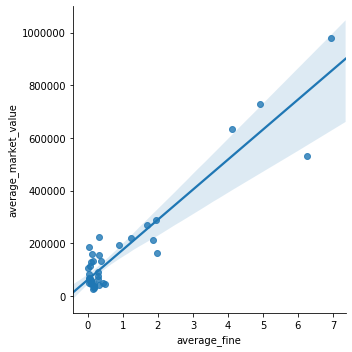

In [53]:
# visualize linear relationships
sns.lmplot(x='average_fine', y='average_market_value', data=ParkingProperties)

# Conculsion